## CMPINF 2100 Week 07

### Visualizing continuous to continuous relationships via CORRELATION PLOTS

This video is another extension of the SCATTER PLOT. But instead of looking at the RAW data, we will focus on a SINGLE SUMMARY STATISTIC that QUANTIFIES the linear relationship between the two continuous variables!!!!!

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Read data

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Scatter plot

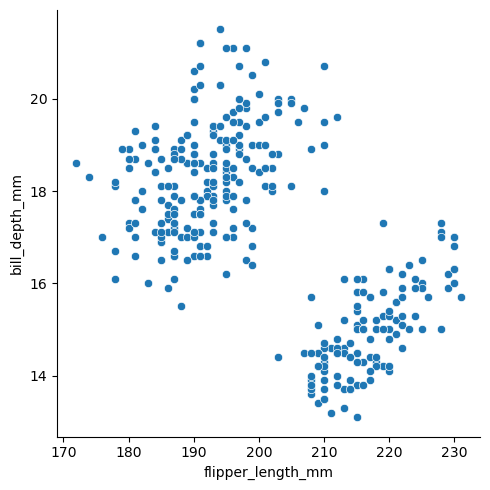

In [4]:
sns.relplot(data = penguins, x='flipper_length_mm', y='bill_depth_mm')

plt.show()

## Trend Plot

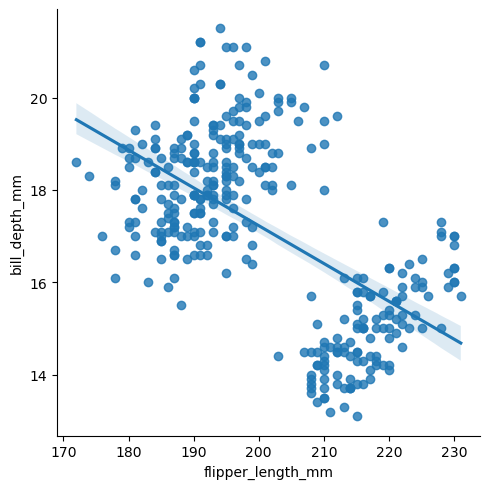

In [5]:
sns.lmplot(data = penguins, x='flipper_length_mm', y='bill_depth_mm')

plt.show()

## Correlation coefficient

The correlation coefficient is between -1 and +1. A value of -1 means there is a perfect ANTI or NEGATIVE **linear** relationship between the two variables. A value of +1 means there is a perfect POSITIVE **linear** relationship between the two variables.

The correlation MATRIX can be calculated via the Pandas `.corr()` method.

In [7]:
penguins.loc[ :, ['flipper_length_mm', 'bill_depth_mm'] ].corr()

,flipper_length_mm,bill_depth_mm
flipper_length_mm,1.000000,-0.583851
bill_depth_mm,-0.583851,1.000000


CORRELATION is representing LINEAR relationships!!!!!

I don't like looking at numbers in TABLES! I instead prefer to VISUALIZE things!!!!

Let's visualize the correlation matrix as a HEAT MAP!!!!

This HEAT MAP is given a special name. It's called the **CORRELATION PLOT** or **CORRPLOT** for short!!!!!!

We need to use the `sns.heatmap()` function to make the CORRPLOT. The `sns.heatmap()` function is an AXIS LEVEL FUNCTION.

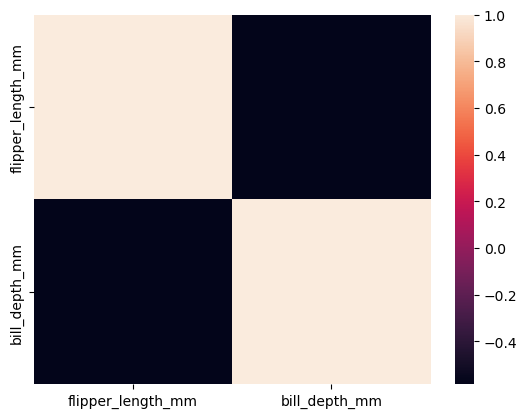

In [8]:
fig, ax = plt.subplots()

sns.heatmap(data = penguins.loc[:, ['flipper_length_mm', 'bill_depth_mm']].corr(),
            ax=ax)

plt.show()

BUT...you should NEVER use the DEFAULT BOUNDS on the COLOR SCALE!!!!

You MUST ALWAYS define the BOUNDS on the color scale to be between -1 and +1 when visualizing CORRPLOTS!!!!!

The bounds are controlled by the `vmin` and `vmax` arguments to `sns.heatmap()`.

AND...you should set the `center` argument which controls the MIDPOINT value between the lower (`vmin`) and upper (`vmax`) color bounds.

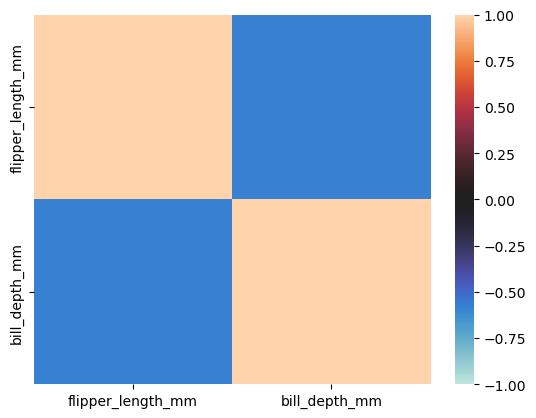

In [10]:
fig, ax = plt.subplots()

sns.heatmap(data = penguins.loc[:, ['flipper_length_mm', 'bill_depth_mm']].corr(),
            vmin=-1, vmax=1, center = 0,
            ax=ax)

plt.show()

Diverging color palettes are important to use for CORRPLOTS because we want to focus on behavior AWAY from the MIDPOINT of a correlation coefficient of 0. A diverging color palette lets us distinguish the SIGN (positive vs negative) based on color while still representing the MAGNITUDE by the color intensity/darkness.

The default color palette is `'icefire'`. The palette can be changed with the `cmap` argument.

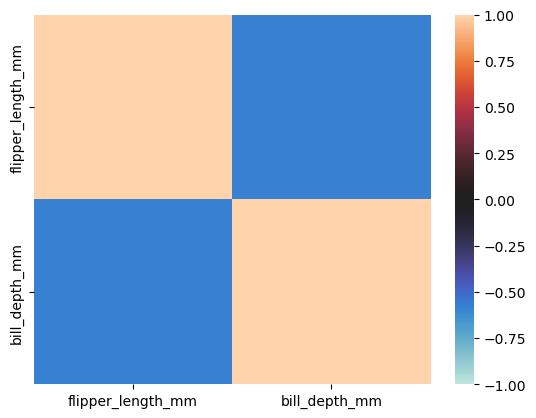

In [11]:
fig, ax = plt.subplots()

sns.heatmap(data = penguins.loc[:, ['flipper_length_mm', 'bill_depth_mm']].corr(),
            vmin=-1, vmax=1, center = 0,
            cmap='icefire',
            ax=ax)

plt.show()

But there are more diverging color palettes. I like `'coolwarm'`.

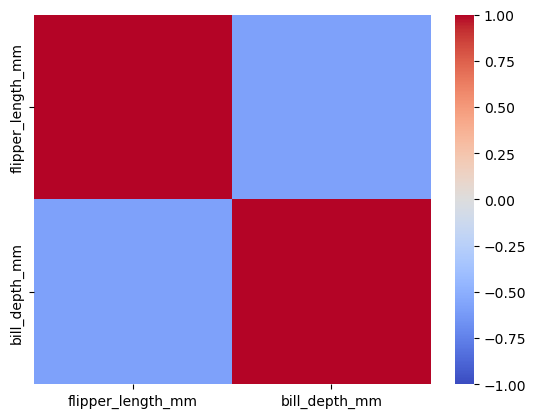

In [12]:
fig, ax = plt.subplots()

sns.heatmap(data = penguins.loc[:, ['flipper_length_mm', 'bill_depth_mm']].corr(),
            vmin=-1, vmax=1, center = 0,
            cmap = 'coolwarm',
            ax=ax)

plt.show()

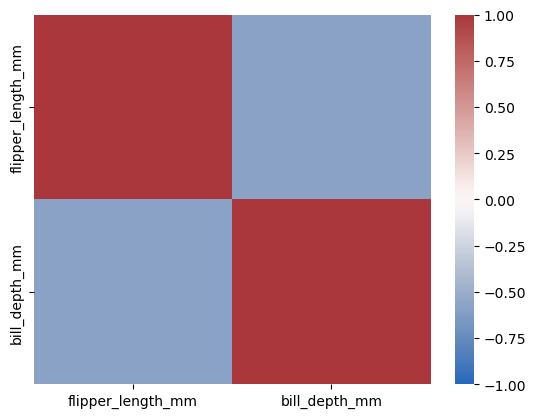

In [13]:
fig, ax = plt.subplots()

sns.heatmap(data = penguins.loc[:, ['flipper_length_mm', 'bill_depth_mm']].corr(),
            vmin=-1, vmax=1, center = 0,
            cmap='vlag',
            ax=ax)

plt.show()

You can ANNOTATE the CORRPLOT via TEXT to make it even easier to display the correlation coefficient!!!

Use the ANNOTATE text to show the EXACT correlation coefficient!

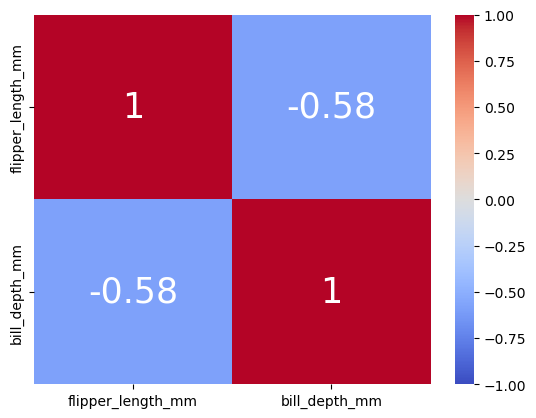

In [14]:
fig, ax = plt.subplots()

sns.heatmap(data = penguins.loc[:, ['flipper_length_mm', 'bill_depth_mm']].corr(),
            vmin=-1, vmax=1, center = 0,
            cmap='coolwarm',
            annot=True, annot_kws={'size': 25},
            ax=ax)

plt.show()

This is for showing 2 specific variables' correlation coefficients.

We can of course change to 2 others...

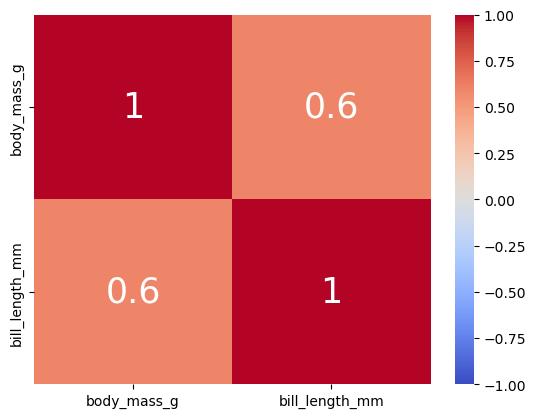

In [19]:
fig, ax = plt.subplots()

sns.heatmap(data = penguins.loc[:, ['body_mass_g', 'bill_length_mm']].corr(),
            vmin=-1, vmax=1, center = 0,
            cmap='coolwarm',
            annot=True, annot_kws={'size': 25},
            ax=ax)

plt.show()

BUT...correlation plots...are particularly great for showing the relationship between more than just 2 continuous variables...

We can show the correlation coefficient between ALL pairs of continuous variables in one chart!

In [22]:
penguins.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


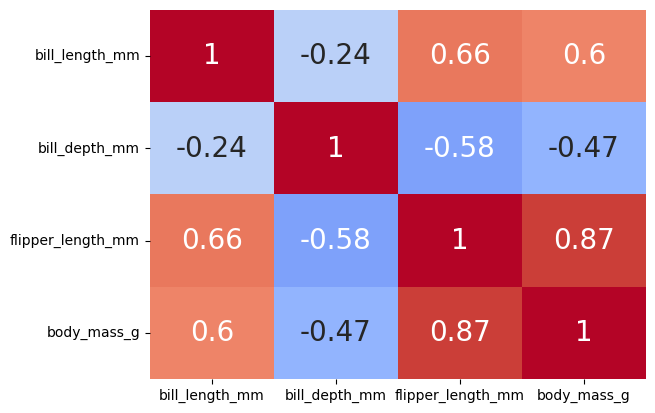

In [25]:
fig, ax = plt.subplots()

sns.heatmap(data = penguins.corr(numeric_only=True),
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm', cbar=False,
            annot=True, annot_kws={'size': 20},
            ax=ax)

plt.show()

## Grouping

Remember we saw that GROUPING BY a categorical CHANGED our opinion about the relationship between two of the continuous variables.

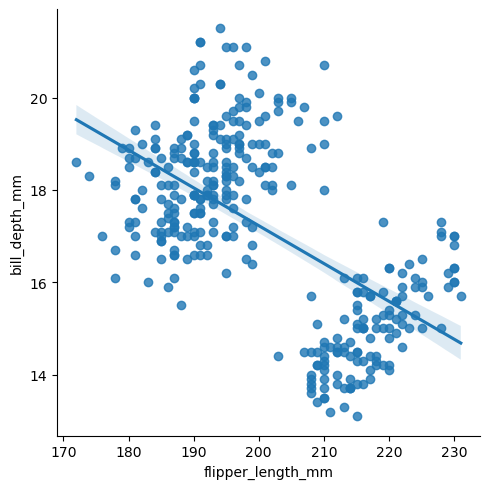

In [26]:
sns.lmplot(data = penguins, x='flipper_length_mm', y='bill_depth_mm')

plt.show()

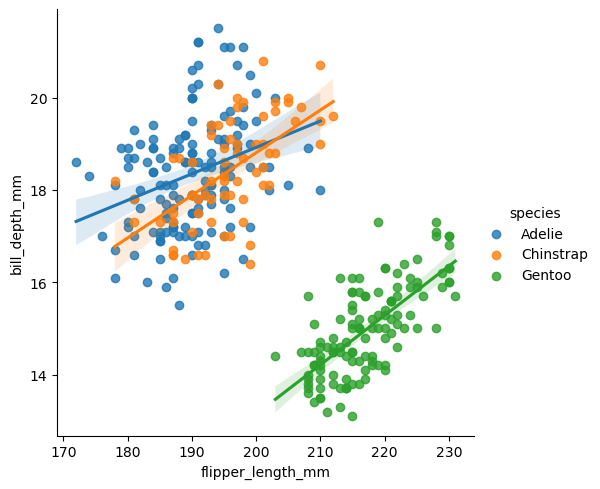

In [27]:
sns.lmplot(data = penguins, x='flipper_length_mm', y='bill_depth_mm', hue='species')

plt.show()

We can GROUP BY a categorical variable and apply the `.corr()` method to get the correlation matrix for EACH category!!!

In [29]:
penguins.loc[:, ['flipper_length_mm', 'bill_depth_mm', 'species']].\
groupby(['species']).\
corr()

flipper_length_mm  bill_depth_mm
species                                                      
Adelie    flipper_length_mm           1.000000       0.307620
          bill_depth_mm               0.307620       1.000000
Chinstrap flipper_length_mm           1.000000       0.580143
          bill_depth_mm               0.580143       1.000000
Gentoo    flipper_length_mm           1.000000       0.706563
          bill_depth_mm               0.706563       1.000000

We can visualize the GROUPED correlation plot by iterating over the GROUPS via a for-loop and applying the `sns.heatmap()` function to that group!!!

`sns.heatmap()` is AXIS level function, it will NOT generate facets for us!!!!

It's useful to define helper objects to store the GROUPS we will iterate over.

In [30]:
the_groups = penguins.species.unique().tolist()

In [31]:
the_groups

['Adelie', 'Chinstrap', 'Gentoo']

In [32]:
corr_per_group = penguins.loc[ :, ['flipper_length_mm', 'bill_depth_mm', 'species']].groupby(['species']).corr()

In [33]:
corr_per_group

flipper_length_mm  bill_depth_mm
species                                                      
Adelie    flipper_length_mm           1.000000       0.307620
          bill_depth_mm               0.307620       1.000000
Chinstrap flipper_length_mm           1.000000       0.580143
          bill_depth_mm               0.580143       1.000000
Gentoo    flipper_length_mm           1.000000       0.706563
          bill_depth_mm               0.706563       1.000000

In [34]:
corr_per_group.loc[ 'Adelie' ]

,flipper_length_mm,bill_depth_mm
flipper_length_mm,1.00000,0.30762
bill_depth_mm,0.30762,1.00000


In [35]:
corr_per_group.loc[ 'Gentoo' ]

,flipper_length_mm,bill_depth_mm
flipper_length_mm,1.000000,0.706563
bill_depth_mm,0.706563,1.000000


In [36]:
corr_per_group.loc[ the_groups[0] ]

,flipper_length_mm,bill_depth_mm
flipper_length_mm,1.00000,0.30762
bill_depth_mm,0.30762,1.00000


In [37]:
corr_per_group.loc[ the_groups[1] ]

,flipper_length_mm,bill_depth_mm
flipper_length_mm,1.000000,0.580143
bill_depth_mm,0.580143,1.000000


One facet (subplot) per grouping value.

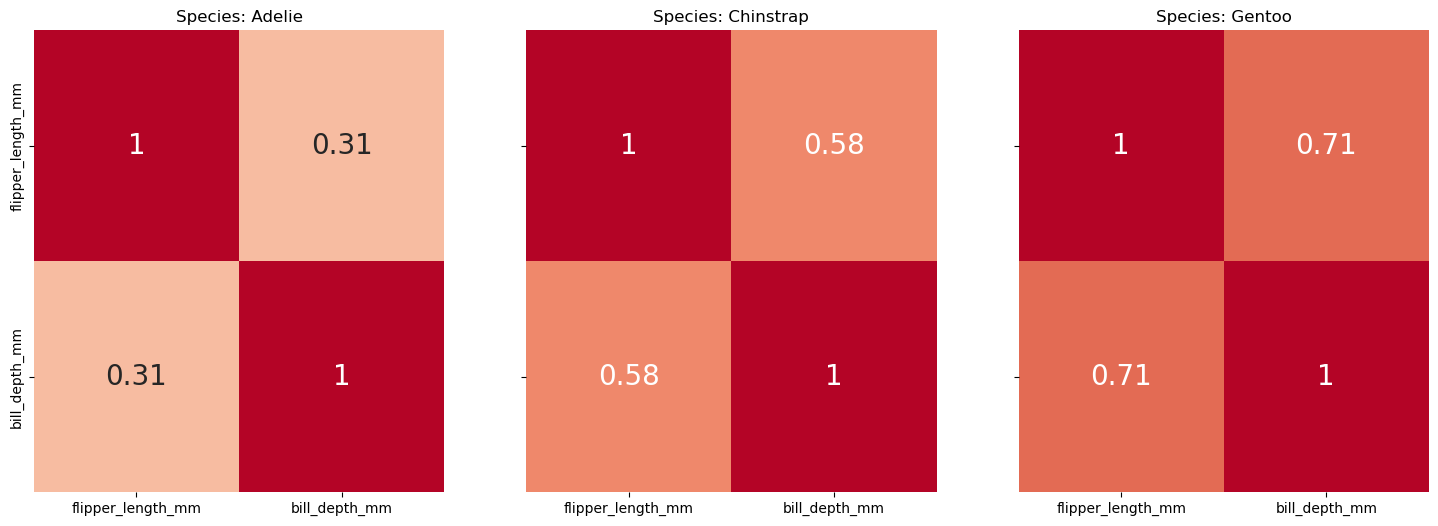

In [38]:
fig, axs = plt.subplots(1, len(the_groups), figsize=(18, 6), sharex=True, sharey=True )

for ix in range(len(the_groups)):
    sns.heatmap( data = corr_per_group.loc[ the_groups[ ix ] ],
                 vmin=-1, vmax=1, center = 0,
                 cmap='coolwarm', cbar=False,
                 annot=True, annot_kws={'size': 20},
                 ax=axs[ix] )
    
    axs[ ix ].set_title('Species: %s' % the_groups[ ix ] )

plt.show()

We can create GROUPED correlation plots between more than just 2 continuous variables!!!!

In [39]:
corr_per_group_all = penguins.groupby('species').corr(numeric_only=True)

In [40]:
corr_per_group_all

bill_length_mm  bill_depth_mm  flipper_length_mm  \
species                                                                         
Adelie    bill_length_mm           1.000000       0.391492           0.325785   
          bill_depth_mm            0.391492       1.000000           0.307620   
          flipper_length_mm        0.325785       0.307620           1.000000   
          body_mass_g              0.548866       0.576138           0.468202   
Chinstrap bill_length_mm           1.000000       0.653536           0.471607   
          bill_depth_mm            0.653536       1.000000           0.580143   
          flipper_length_mm        0.471607       0.580143           1.000000   
          body_mass_g              0.513638       0.604498           0.641559   
Gentoo    bill_length_mm           1.000000       0.643384           0.661162   
          bill_depth_mm            0.643384       1.000000           0.706563   
          flipper_length_mm        0.661162       0.706563           1.000000   
          body_mass_g              0.669166       0.719085           0.702667   

                             body_mass_g  
species                                   
Adelie    bill_length_mm        0.548866  
          bill_depth_mm         0.576138  
          flipper_length_mm     0.468202  
          body_mass_g           1.000000  
Chinstrap bill_length_mm        0.513638  
          bill_depth_mm         0.604498  
          flipper_length_mm     0.641559  
          body_mass_g           1.000000  
Gentoo    bill_length_mm        0.669166  
          bill_depth_mm         0.719085  
          flipper_length_mm     0.702667  
          body_mass_g           1.000000

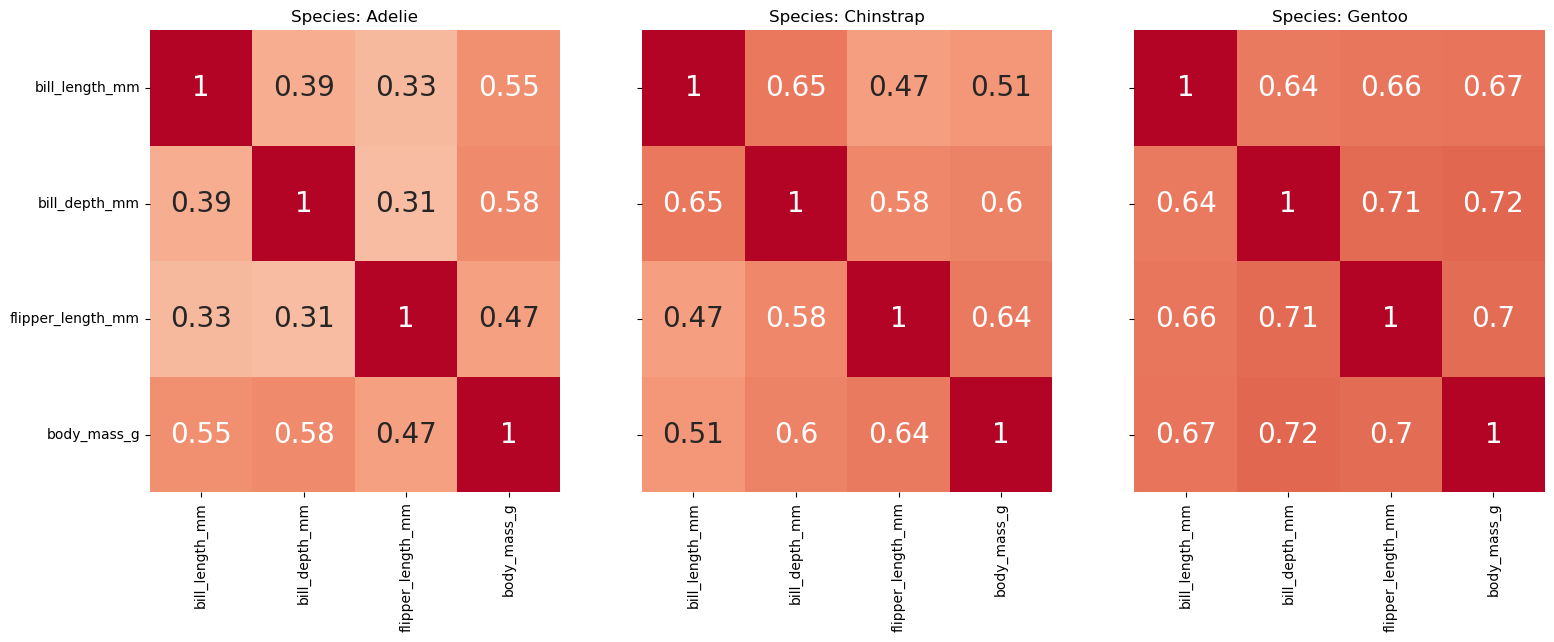

In [41]:
fig, axs = plt.subplots(1, len(the_groups), figsize=(18, 6), sharex=True, sharey=True )

for ix in range(len(the_groups)):
    sns.heatmap( data = corr_per_group_all.loc[ the_groups[ ix ] ],
                 vmin=-1, vmax=1, center = 0,
                 cmap='coolwarm', cbar=False,
                 annot=True, annot_kws={'size': 20},
                 ax=axs[ix] )
    
    axs[ ix ].set_title('Species: %s' % the_groups[ ix ] )

plt.show()